In [1]:
import main
import plot_inequality as plot_ineq
import time
import importlib
import io_manager
import numpy as np
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/model_uncert/"
input_path = main_path + "input/50p_age_moms/"

trans_path = main_path + "input/50p_age_moms/MH_trans_uncond_age.csv"
test_trans_path = main_path + "input/50p_age_moms/MH_trans_test_age.csv"
iid_trans_path = main_path + "input/50p_age_moms/MH_trans_test_iid.csv"
perm_trans_path = main_path + "input/50p_age_moms/MH_trans_test_perm.csv"

do_dpi_calib = False
# do_dpi_calib = True
output_flag = False
myPars, myShocks, sols, sims = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_path,
                                            output_flag = output_flag, do_dpi_calib = do_dpi_calib)

Running main
*****Running main_io with default out_folder_name*****
Solver ran in 6.8125130999978865 seconds
Calibrating with alpha_lab_targ = 0.33495033, w0_mean_targ = 2.1986368, w0_sd_targ = 0.29955208, 
                                        w1_targ = 0.2915730000000001, w2_targ = 0.2731836000000003, wH_targ = 0.051262233,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 4 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 5 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Cal

In [2]:
import calibration as calib
importlib.reload(main)
importlib.reload(calib)
do_dpi_calib = True
output_flag = False
myPars_adj, myShocks_adj, sols_adj, sims_adj = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_path,
                                            output_flag = output_flag, do_dpi_calib = do_dpi_calib)


*****Running main_io with default out_folder_name*****
Solver ran in 0.5145046999969054 seconds
Calibrating with alpha_lab_targ = 0.33495033, w0_mean_targ = 2.1986368, w0_sd_targ = 0.29955208, 
                                        w1_targ = 0.2915730000000001, w2_targ = 0.2731836000000003, wH_targ = 0.051262233,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating delta_pi_GG
my_dpi_BB_mom: 0.469230422789032, my_dpi_GG_mom: 0.34338303924920055
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
my_dpi_BB_mom: 0.5325366055556626, my_dpi_GG_mom: 0.34338303924920055
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
my_dpi_BB_mom: 0.5325366055556626, my_dpi_GG_mom: 0.34338303924920055
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
my_dpi_BB_mom: 0.5325366055556626, my_dpi_GG_mom: 0.3433830392492005

In [3]:
import pandas as pd
import model_uncert as model
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(input_path + "mean_bad_MH_by_age.csv")
print("bad_MH_age_data", bad_MH_age_data.head())
# get second column as numpy array
bad_hist_age_data = bad_MH_age_data.to_numpy()[:,1:]

hist = myShocks.H_hist
bad_hist = 1 - hist 
bad_hist_age = np.sum(model.gen_weighted_sim(myPars, bad_hist), tuple(range(bad_hist.ndim - 1)))
print("bad_hist_age \t", bad_hist_age[:5])

hist_adj = myShocks_adj.H_hist
bad_hist_adj = 1 - hist_adj
bad_hist_age_adj = np.sum(model.gen_weighted_sim(myPars_adj, bad_hist_adj), tuple(range(bad_hist_adj.ndim - 1)))
print("bad_hist_age_adj", bad_hist_age_adj[:5], "\n")


bad_MH_age_data    age  mean_badMH
0   25    0.483646
1   26    0.487822
2   27    0.478969
3   28    0.457216
4   29    0.461950
bad_hist_age 	 [0.483      0.48794202 0.50267563 0.47528028 0.49510329]
bad_hist_age_adj [0.483      0.48139514 0.47561808 0.42323631 0.42909787] 



In [4]:
from pars_shocks import Shocks, Pars
from numba import njit  

@njit
def gen_H_hist(myPars: Pars, H_shocks: np.ndarray) -> np.ndarray:
    BAD = 0
    GOOD = 1
    hist = np.zeros(myPars.state_space_shape_sims, dtype=np.int64)
    # just test the first two or three periods
    for j in range(myPars.J+1):
    # for j in range(3):
        if j > 0:
            hist_j = hist[:, :, :, j-1]
            xgg_j = gen_xgg_j(myPars, hist_j, j-1)
            print("xgg_j", xgg_j)
        for lab_fe_ind in range(myPars.lab_fe_grid_size):
            # for start_H_ind in range(myPars.H_grid_size):
            for H_type_perm_ind in range(myPars.H_type_perm_grid_size):
                for sim_ind in range(myPars.sim_draws):
                    if j > 0:
                        shock = H_shocks[lab_fe_ind, H_type_perm_ind, sim_ind, j-1]       
                        prev_health_state_ind = hist[lab_fe_ind, H_type_perm_ind, sim_ind, j-1]
                        if prev_health_state_ind == GOOD:
                            H_tran = myPars.H_trans[H_type_perm_ind, j-1, prev_health_state_ind, GOOD]
                            health_recovery_prob = myPars.H_trans[H_type_perm_ind, j-1, prev_health_state_ind, GOOD] * xgg_j
                            if sim_ind == 0 and lab_fe_ind == 0:
                                print("H_tran", H_tran, "H_tran_xgg", health_recovery_prob, "type: ", H_type_perm_ind)
                        else:
                            health_recovery_prob = myPars.H_trans[H_type_perm_ind, j-1, prev_health_state_ind, GOOD]
                        if shock <= health_recovery_prob:
                                hist[lab_fe_ind, H_type_perm_ind, sim_ind, j] = GOOD
                    else:
                        if sim_ind / myPars.sim_draws < myPars.H_beg_pop_weights_by_H_type[H_type_perm_ind, GOOD]:
                            hist[lab_fe_ind, H_type_perm_ind, sim_ind, j] = GOOD
    return hist
@njit
def gen_xgg_j(myPars: Pars, H_hist_j: np.ndarray, j: int) -> float:
    BAD, GOOD = 0, 1
    LOW, HIGH = 0, 1 
    pi = myPars.H_trans_uncond[j, GOOD, GOOD]
    delta = myPars.delta_pi_GG
    omeg_numer = np.sum(myPars.lab_fe_weights[:, np.newaxis] * H_hist_j[:, GOOD, :])
    omeg_denom = np.sum(myPars.lab_fe_weights[:, np.newaxis] * np.sum(H_hist_j, axis=1)) # first collapse to lab_fe dimension then weigthed sum over lab_fe
    # omeg_numer = np.sum(H_hist_j[:, GOOD, :])
    # omeg_denom = np.sum(H_hist_j)
    omega_gl = omeg_numer / omeg_denom
    # xgg = pi*(pi + delta - 2*omega_gl*delta)**(-1)
    xgg = pi*(omega_gl * (pi-delta) + (1-omega_gl) * (pi + delta))**(-1)
    return xgg

hist = myShocks.H_hist
bad_hist = 1 - hist 
bad_hist_age = np.sum(model.gen_weighted_sim(myPars, bad_hist), tuple(range(bad_hist.ndim - 1)))
print("bad_hist_age \t", bad_hist_age[:5])

hist_adj = myShocks_adj.H_hist
bad_hist_adj = 1 - hist_adj
bad_hist_age_adj = np.sum(model.gen_weighted_sim(myPars_adj, bad_hist_adj), tuple(range(bad_hist_adj.ndim - 1)))
print("bad_hist_age_adj", bad_hist_age_adj[:5])

new_hist = gen_H_hist(myPars_adj, myShocks_adj.H_shocks)
new_bad_hist = 1 - new_hist
new_bad_hist_age = np.sum(model.gen_weighted_sim(myPars_adj, new_bad_hist), tuple(range(new_bad_hist.ndim - 1)))
print("new_bad_hist_age", new_bad_hist_age[:5])

bad_hist_age 	 [0.483      0.48794202 0.50267563 0.47528028 0.49510329]
bad_hist_age_adj [0.483      0.48139514 0.47561808 0.42323631 0.42909787]
xgg_j 1.0
H_tran 0.5049883035839844 H_tran_xgg 0.5049883035839844 type:  0
H_tran 0.9661582764160157 H_tran_xgg 0.9661582764160157 type:  1
xgg_j 1.113592171080916
H_tran 0.48197563977539065 H_tran_xgg 0.5367242991055908 type:  0
H_tran 0.9221297802246095 H_tran_xgg 1.0268765039786907 type:  1
xgg_j 1.162245471507704
H_tran 0.9536781081054687 H_tran_xgg 1.1084080624216155 type:  1
xgg_j 1.1677560611396542
H_tran 0.9143854830078124 H_tran_xgg 1.0677791900004834 type:  1
xgg_j 1.184989296453647
H_tran 0.9545680935546874 H_tran_xgg 1.1311529735984682 type:  1
xgg_j 1.1905163890730723
H_tran 0.5023996227929688 H_tran_xgg 0.5981149847991588 type:  0
H_tran 0.9612055372070312 H_tran_xgg 1.1443309453127575 type:  1
xgg_j 1.207319313415191
H_tran 0.4867742463769531 H_tran_xgg 0.58769194892402 type:  0
H_tran 0.9313106136230469 H_tran_xgg 1.1243892906

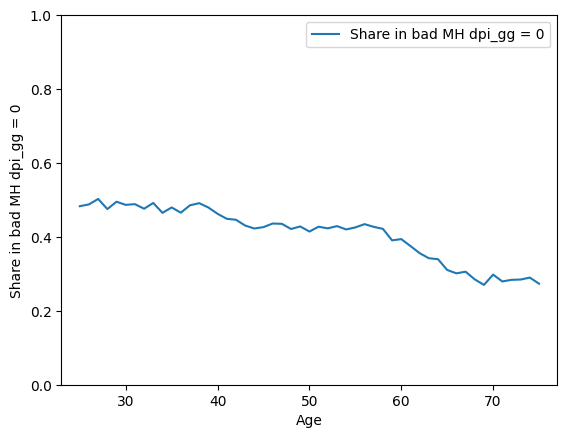

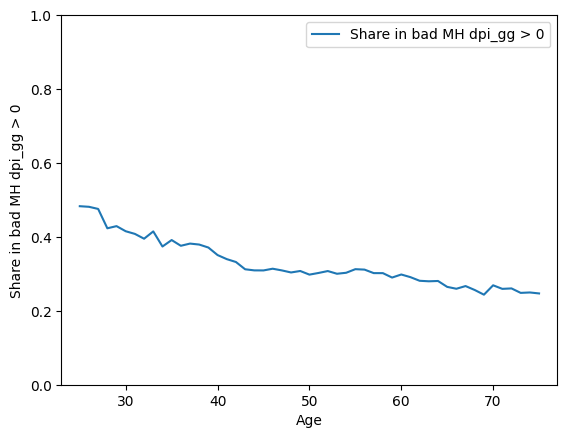

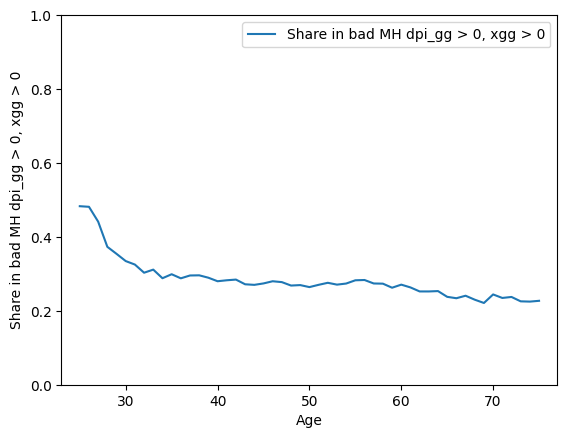

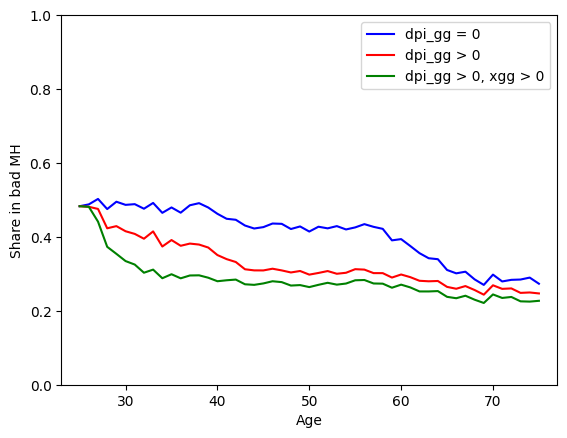

In [5]:
import my_toolbox as tb
age_grid = myPars.age_grid
fig_bad_hist, ax_bad_hist = tb.plot_lc_mom_by_age(bad_hist_age, age_grid, "Share in bad MH dpi_gg = 0", y_lim = [0, 1])
fig_bad_hist_adj, ax_bad_hist_adj = tb.plot_lc_mom_by_age(bad_hist_age_adj, age_grid, "Share in bad MH dpi_gg > 0", y_lim = [0, 1])
fig_new_bad_hist, ax_new_bad_hist = tb.plot_lc_mom_by_age(new_bad_hist_age, age_grid, "Share in bad MH dpi_gg > 0, xgg > 0", y_lim = [0, 1])

fig_ax_lists = [(fig_bad_hist, ax_bad_hist), (fig_bad_hist_adj, ax_bad_hist_adj), (fig_new_bad_hist, ax_new_bad_hist)]
label_lists = [["dpi_gg = 0"], ["dpi_gg > 0"], ["dpi_gg > 0, xgg > 0"]]
colors = ["blue", "red", "green"]
fig_comb_bad_hist, ax_comb_bad_hist = tb.combine_plots(fig_ax_lists, "Share in bad MH by age", y_lim = [0, 1], y_label = "Share in bad MH", x_label = "Age", 
                                                        label_lists = label_lists, colors = colors)

In [6]:
BAD, GOOD = 0, 1
LOW, HIGH = 0, 1
pers = 3
delta_gg = myPars_adj.delta_pi_GG
print("delta_gg", delta_gg)
H_trans_uncond = myPars_adj.H_trans_uncond
H_trans = myPars_adj.H_trans
print("Health good to good")
print("H_trans_uncond")
print(H_trans_uncond[:pers, GOOD, GOOD])
print("H_trans by type")
print("Low")
print(H_trans[LOW, :pers, GOOD, GOOD])
print("High")
print(H_trans[HIGH, :pers, GOOD, GOOD])

delta_gg 0.3134765625
Health good to good
H_trans_uncond
[0.73557329 0.70205271 0.72607166]
H_trans by type
Low
[0.5049883  0.48197564 0.49846521]
High
[0.96615828 0.92212978 0.95367811]


In [7]:
import my_toolbox as tb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_path = main_path + "input/50p_age_moms/"
# autocorr_input_path = main_path + "autocorr_matrix.csv"
autocorr_input_path = main_path + "autocorr_matrix_indiv_lag.csv"

# read in csv to pandas
autocorr_pd = pd.read_csv(input_path + "autocorr_matrix.csv")
# print(autocorr_pd.head())

H_hist_ac [1.         0.53253661 0.41702098 0.37978892 0.36488203 0.35642086
 0.35242986 0.34831702 0.34625877 0.34482471 0.34338304]


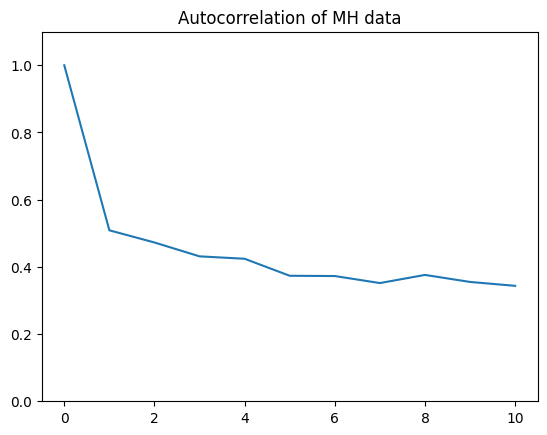

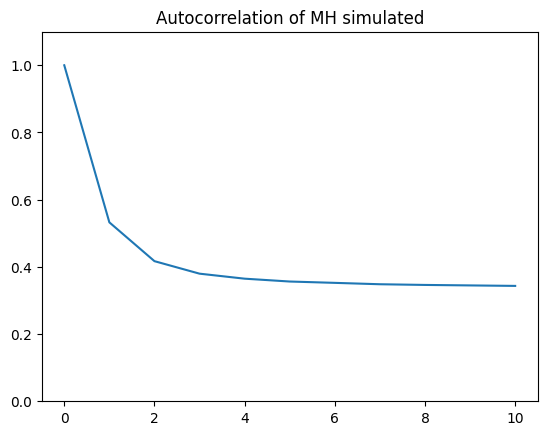

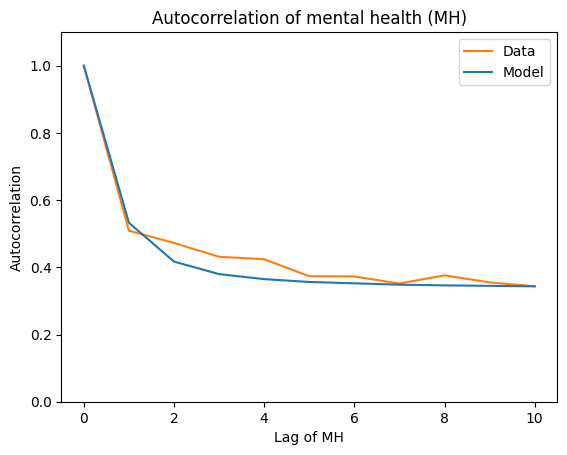

In [8]:

autocorr_y_lim = [0, 1.1]
from typing import Tuple

def plot_autocorr(autocorr_data: np.ndarray, var_name: str = None, y_lim: list = [0, 1.1], quietly: bool = False)-> Tuple[plt.Figure, plt.Axes]:
    fig_data, ax_data = plt.subplots()
    ax_data.plot(autocorr_data)
    ax_data.set_title(f"Autocorrelation of {var_name}")
    ax_data.set_ylim(y_lim)
    if not quietly:
        plt.show()
    return fig_data, ax_data

quietly = True
MH_autocorr = autocorr_pd["MH"].values
fig_data_MH, ax_data_MH = plot_autocorr(MH_autocorr, "MH data", autocorr_y_lim, quietly = quietly)

# H_hist = myShocks.H_hist[:, :, :, :-1]
H_hist = myShocks_adj.H_hist[:, :, :, :-1]
H_hist_ac = tb.lagged_corr(H_hist, max_lag=10)
fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim, quietly = quietly)
print("H_hist_ac", H_hist_ac)

corr_save_path = main_path + "output/autocorr_figs/"
comb_fig_title_prefix = "Autocorrelation of "
# comb_fig_title_suffix = " in the data and the model"
comb_fig_title_suffix = ""

label_lists = [["Data"], ["Model"]]
color_list = ["C1", "C0"]
x_label = "Lag"
y_label = "Autocorrelation"
fig_comb_MH_autocorr, ax_comb_MH_autocorr = tb.combine_plots([(fig_data_MH, ax_data_MH), (fig_sim_H_ac, ax_sim_H_ac)],
                                                                comb_fig_title = comb_fig_title_prefix + "mental health (MH)" + comb_fig_title_suffix, 
                                                                x_label = x_label + " of MH", y_label = y_label,
                                                                label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_MH.pdf")

bad_MH_age_data    age  mean_badMH
0   25    0.483646
1   26    0.487822
2   27    0.478969
3   28    0.457216
4   29    0.461950
bad_MH_age_sim [0.483      0.48139514 0.47561808 0.42323631 0.42909787 0.41525125
 0.4080709  0.39503096 0.41480982 0.37395088 0.39143232 0.37591858
 0.381857   0.37924465 0.37116477 0.35082136 0.33982712 0.33202883
 0.31237886 0.30936733 0.30923295 0.31386866 0.30928065 0.30371858
 0.30772493 0.29788914 0.30241065 0.30754824 0.30022768 0.30289862
 0.31262149 0.31145352 0.30197159 0.30188306 0.28995606 0.29822168
 0.29102624 0.28122896 0.27983912 0.28067251 0.26471714 0.25965101
 0.26693647 0.25624428 0.24362395 0.26900831 0.2593574  0.26056553
 0.24848378 0.24960654 0.24697806]


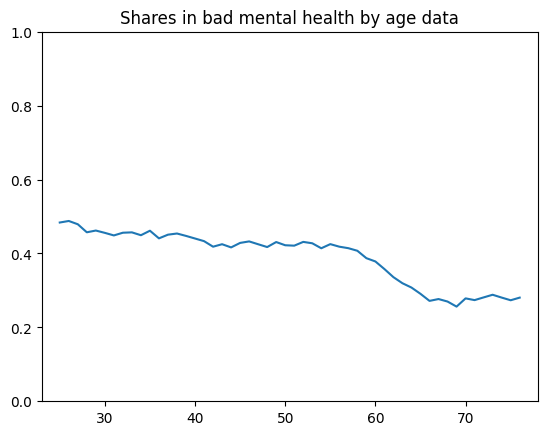

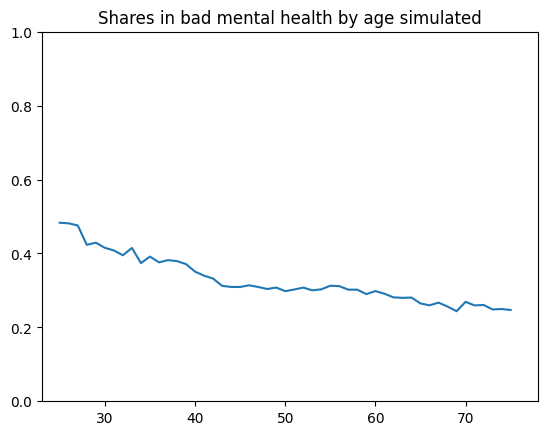

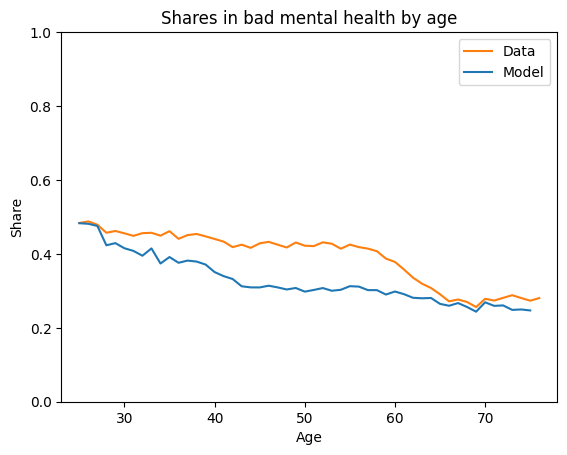

In [9]:

import model_uncert as model

# trans_path_uncond = main_path + "input/50p_age_moms/MH_trans_uncond_age.csv"
# myPars.H_trans = io_manager.read_and_shape_H_trans_uncond_age(myPars, trans_path_uncond)

# H_hist = myShocks.H_hist[:, :, :, :-1]
# H_hist_ac = lagged_corr(H_hist, max_lag=10)
# fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim)
# # print("H_hist_ac", H_hist_ac)

shares_y_lim = [0, 1.0]
# shares in bad health by earnings (maybe later by wage, hours, etc)
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(input_path + "mean_bad_MH_by_age.csv")
print("bad_MH_age_data", bad_MH_age_data.head())
# get second column as numpy array
bad_MH_age_data = bad_MH_age_data.to_numpy()[:,1:]
# plot shares in bad health by earnings
fig_bad_MH_data, ax_bad_MH_data = plt.subplots()
ax_bad_MH_data.plot(age_grid, bad_MH_age_data)
ax_bad_MH_data.set_title("Shares in bad mental health by age data")
ax_bad_MH_data.set_xlim([age_grid[0]-2, age_grid[-1]+2])    
ax_bad_MH_data.set_ylim(shares_y_lim)
# plt.show()

# model shares in bad health by age
# weighted_H_hist = model.gen_weighted_sim(myPars, H_hist) 
weighted_H_hist = model.gen_weighted_sim(myPars_adj, H_hist) 
good_MH_age_sim = np.sum(weighted_H_hist, tuple(range(H_hist.ndim - 1)))
bad_MH_age_sim = 1 - good_MH_age_sim
# print("good_MH_age_sim", good_MH_age_sim)
print("bad_MH_age_sim", bad_MH_age_sim)
fig_bad_MH_sim, ax_bad_MH_sim = plt.subplots()
ax_bad_MH_sim.plot(age_grid[:-1], bad_MH_age_sim)
ax_bad_MH_sim.set_title("Shares in bad mental health by age simulated")
ax_bad_MH_sim.set_xlim([age_grid[0]-2, age_grid[-1]+2])
ax_bad_MH_sim.set_ylim(shares_y_lim)
# plt.show()

fig_comb_bad_MH, ax_comb_bad_MH = tb.combine_plots([(fig_bad_MH_data, ax_bad_MH_data), (fig_bad_MH_sim, ax_bad_MH_sim)],
                                                    comb_fig_title = "Shares in bad mental health by age", x_label = "Age", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, save_path = corr_save_path + "shares_bad_MH.pdf")

In [10]:
H_trans = myPars.H_trans
print(H_trans)

[[[[0.72621125 0.27378875]
   [0.26442671 0.73557329]]

  [[0.72240686 0.27759314]
   [0.29794729 0.70205271]]

  [[0.67725646 0.32274354]
   [0.27392834 0.72607166]]

  [[0.70398605 0.29601395]
   [0.30384332 0.69615668]]

  [[0.70213825 0.29786175]
   [0.27325076 0.72674924]]

  [[0.72107238 0.27892762]
   [0.26819742 0.73180258]]

  [[0.67628318 0.32371682]
   [0.29095757 0.70904243]]

  [[0.72265375 0.27734625]
   [0.29040653 0.70959347]]

  [[0.67496461 0.32503539]
   [0.25829113 0.74170887]]

  [[0.71270859 0.28729141]
   [0.27340358 0.72659642]]

  [[0.70076603 0.29923397]
   [0.2601462  0.7398538 ]]

  [[0.72764879 0.27235121]
   [0.27031267 0.72968733]]

  [[0.71625149 0.28374851]
   [0.2636717  0.7363283 ]]

  [[0.70396262 0.29603738]
   [0.26341748 0.73658252]]

  [[0.71581954 0.28418046]
   [0.24535465 0.75464535]]

  [[0.71635431 0.28364569]
   [0.23358637 0.76641363]]

  [[0.71262634 0.28737366]
   [0.23047543 0.76952457]]

  [[0.68827039 0.31172961]
   [0.22897893 0.7710